In [35]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [36]:
beta_1, lambda_, mu_H, gamma, delta, beta_2, wedge, mu_D, eta, tau, theta = sp.symbols('beta_1, lambda, mu_H, gamma, delta, beta_2, \wedge, mu_D, eta, tau, theta')

In [37]:
R_0 = (beta_1 * lambda_)/((mu_H)*(gamma + mu_H + delta)) + (beta_2*wedge)/((mu_D + eta)*(tau + mu_D + theta))

In [38]:
display(R_0)

\wedge*beta_2/((eta + mu_D)*(mu_D + tau + theta)) + beta_1*lambda/(mu_H*(delta + gamma + mu_H))

In [39]:
params =[
    (beta_1, 1.29*1e-8),
      (lambda_,12*1e7 ),
      (mu_H, 0.099),
      (delta, 1),
      (gamma, 2),
      (wedge, 3*1e7),
      (mu_D, 0.25),
      (beta_2, 1.29*1e-7),
      (eta, 0.1),
      (theta, 0.0022),
      (tau, 0.09999)
]

In [40]:
sens_beta_1 = (R_0.diff(beta_1) * beta_1/R_0).subs(params)
sens_beta_1

0.138459836296670

In [41]:
sens_lambda_ = (R_0.diff(lambda_) * lambda_/R_0).subs(params)
sens_lambda_

0.138459836296670

In [42]:
sens_mu_H = (R_0.diff(mu_H) * mu_H/R_0).subs(params)
sens_mu_H

-0.142883045007018

In [43]:
sens_gamma= (R_0.diff(gamma) * gamma/R_0).subs(params)
sens_gamma

-0.0893577517242142

In [44]:
sens_delta = (R_0.diff(delta) * delta/R_0).subs(params)
sens_delta

-0.0446788758621071

In [45]:
sens_beta_2 = (R_0.diff(beta_2) * beta_2/R_0).subs(params)
sens_beta_2

0.861540163703330

In [46]:
sens_wedge = (R_0.diff(wedge) * wedge/R_0).subs(params)
sens_wedge

0.861540163703330

In [47]:
sens_mu_D = (R_0.diff(mu_D) * mu_D/R_0).subs(params)
sens_mu_D 

-1.22694504904179

In [48]:
sens_eta = (R_0.diff(eta) * eta/R_0).subs(params)
sens_eta 

-0.246154332486666

In [49]:
sens_tau= (R_0.diff(tau) * tau/R_0).subs(params)
sens_tau

-0.244599224761339

In [50]:
sens_theta = (R_0.diff(theta) * theta/R_0).subs(params)
sens_theta

-0.00538172111686114

In [51]:
sens_vals = [sens_beta_1, sens_lambda_, sens_mu_H, sens_gamma, sens_delta, sens_beta_2, sens_wedge, sens_mu_D, sens_eta, sens_tau, sens_theta]
labels = ['beta_1', 'lambda_', 'mu_H', 'gamma', 'delta', 'beta_2', 'wedge', 'mu_D', 'eta', 'tau', 'theta']
# changing symbols to latex
latex_labels = [
    r'$\beta_1$', r'$\lambda$', r'$\mu_H$', r'$\gamma$', r'$\delta$', 
    r'$\beta_2$', r'$\wedge$', r'$\mu_D$', r'$\eta$', r'$\tau$', r'$\theta$'
]

In [52]:
kk = pd.DataFrame(
    {
        'features': latex_labels,
        'sensitivity_values': sens_vals
    }
)

In [53]:
kk

,features,sensitivity_values
0,$\beta_1$,0.138459836296670
1,$\lambda$,0.138459836296670
2,$\mu_H$,-0.142883045007018
3,$\gamma$,-0.0893577517242142
4,$\delta$,-0.0446788758621071
5,$\beta_2$,0.861540163703330
6,$\wedge$,0.861540163703330
7,$\mu_D$,-1.22694504904179
8,$\eta$,-0.246154332486666
9,$\tau$,-0.244599224761339


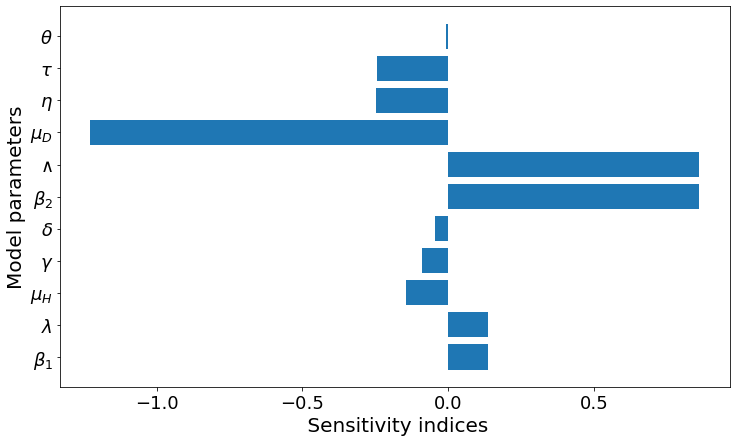

In [54]:
plt.figure(figsize=(12,7))
plt.barh(kk['features'], kk['sensitivity_values'])
plt.xlabel(' Sensitivity indices', fontdict={'size': 20})
plt.ylabel('Model parameters', fontdict={'size': 20})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('sensitivity_analysis.png')

In [55]:
R_0.subs(params)

36.4410071741823

#### THE FUNCTION  FOR PARAMETERS AND INITIAL CONDITIONS

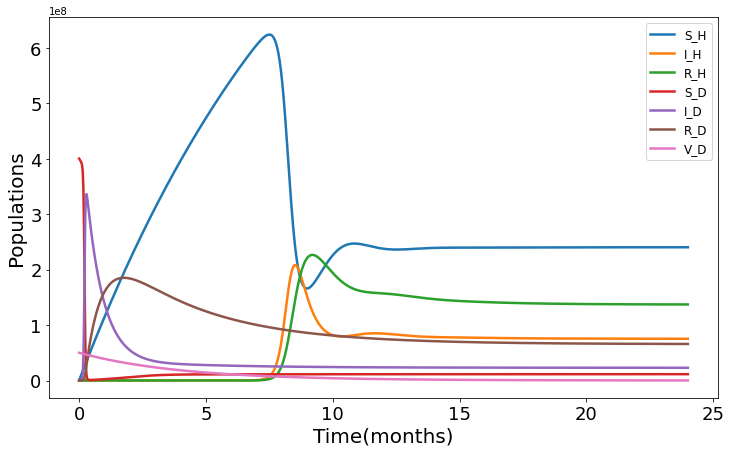

In [56]:
beta_1=1.29*1e-8
lambda_=12*1e7
mu_H=0.099
delta= 1
gamma= 2
wedge= 3*1e7
mu_D= 0.25
beta_2= 1.29*1e-7
eta= 0.0001
theta= 0.22
tau=0.9999
sigma= 1
phi= 0.1
params = [lambda_, sigma, beta_1, mu_H, gamma, delta, wedge, phi, beta_2, mu_D, eta, tau, theta]

def myfun(y, t, params):
    sh, ih, rh, sd, iid, rd, vd = y
    
    # defining the equations
    dshdt = params[0] + params[1]*rh - (params[2]*ih + params[3])*sh
    dihdt = params[2]*sh*ih - (params[4] + params[3] + params[5])*ih
    drhdt = params[4]*ih - (params[3] + params[1])*rh
    dsddt = params[6] + params[7]*rd - (params[8]*iid + params[9] + params[10])*sd
    diddt = params[8]*sd*iid - (params[11] + params[9] + params[12])*iid
    drddt = params[11]*iid - (params[9] + params[7])*rd
    dvddt = params[10]*sd - params[9]*vd

    return [dshdt, dihdt, drhdt, dsddt, diddt, drddt, dvddt]

t = np.linspace(0,24,1000)

y0 = [2*1e5,1*1e2,2*1e4, 4*1e8, 1.2*1e4,9*1e2, 5*1e7]

res = odeint(myfun, y0=y0, t=t, args=(params,),rtol=1e-6, atol=1e-6)
       
plt.figure(figsize=(12,7))

plt.plot(t, res[:,0], label='S_H',  lw=2.5)
plt.plot(t, res[:,1],  label='I_H',  lw=2.5)
plt.plot(t, res[:,2],  label='R_H',  lw=2.5)
plt.plot(t, res[:,3],  label='S_D',  lw=2.5)
plt.plot(t, res[:,4],  label='I_D',  lw=2.5)
plt.plot(t, res[:,5],  label='R_D',  lw=2.5)
plt.plot(t, res[:,6],  label='V_D',  lw=2.5)
plt.xlabel('Time(months)', fontdict={'size': 20})
plt.ylabel('Populations',  fontdict={'size': 20})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim([-10,100])
plt.legend(fontsize=12)
plt.savefig('Human and Dog populations.png')

#### THE PLOT OF EACH HUMAN POPULATION

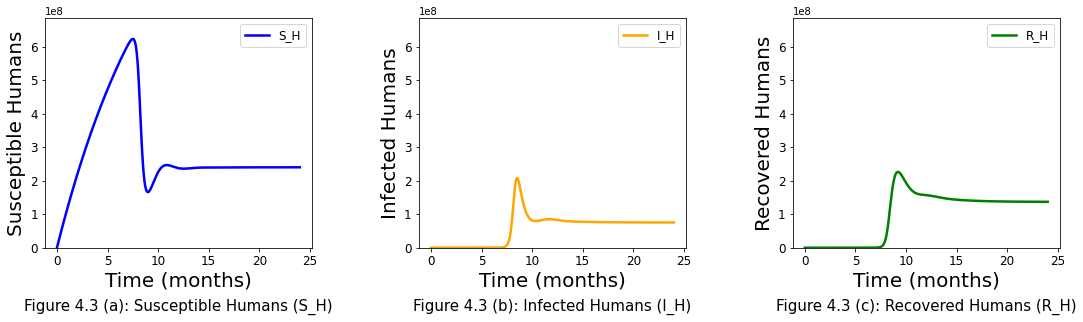

In [23]:
max_population = np.max(res[:, :3])
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

# Plot of  S_H
axes[0].plot(t, res[:, 0], label='S_H', lw=2.5, color='b')
axes[0].set_xlabel('Time (months)', fontdict={'size': 20})
axes[0].set_ylabel('Susceptible Humans', fontdict={'size': 20})
axes[0].tick_params(axis='both', labelsize=12)  
axes[0].legend(fontsize=12)
axes[0].set_title('Figure 4.3 (a): Susceptible Humans (S_H)', y=-0.3, fontsize=15)
axes[0].set_ylim([0, max_population * 1.1]) 

# Plot of  I_H
axes[1].plot(t, res[:, 1], label='I_H', lw=2.5, color='orange')  
axes[1].set_xlabel('Time (months)', fontdict={'size': 20})
axes[1].set_ylabel('Infected Humans', fontdict={'size': 20})
axes[1].tick_params(axis='both', labelsize=12)  
axes[1].legend(fontsize=12)
axes[1].set_title('Figure 4.3 (b): Infected Humans (I_H)', y=-0.3, fontsize=15)
axes[1].set_ylim([0, max_population * 1.1])  

# Plot  of R_H
axes[2].plot(t, res[:, 2], label='R_H', lw=2.5, color='g') 
axes[2].set_xlabel('Time (months)', fontdict={'size': 20})
axes[2].set_ylabel('Recovered Humans', fontdict={'size': 20})
axes[2].tick_params(axis='both', labelsize=12)  
axes[2].legend(fontsize=12)
axes[2].set_title('Figure 4.3 (c): Recovered Humans (R_H)', y=-0.3, fontsize=15)
axes[2].set_ylim([0, max_population * 1.1]) 

plt.tight_layout(rect=[0, 0.05, 1, 1]) 
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.savefig('Human_populations_horizontal_6.png', bbox_inches='tight')
plt.show()


#### THE PLOT OF HUMAN  POPULATIONS

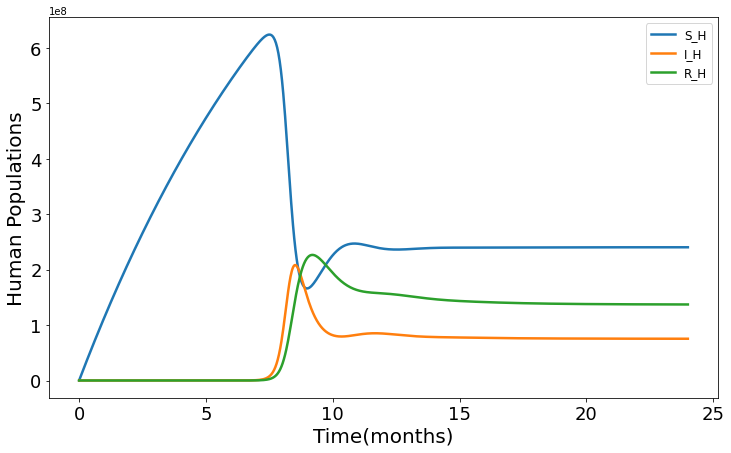

In [24]:
plt.figure(figsize=(12,7))
plt.plot(t, res[:,0], label='S_H',  lw=2.5)
plt.plot(t, res[:,1],  label='I_H',  lw=2.5)
plt.plot(t, res[:,2], label='R_H',  lw=2.5)
plt.xlabel('Time(months)',  fontdict={'size': 20})
plt.ylabel('Human Populations',  fontdict={'size': 20})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.savefig('Human population_2.png')

#### THE PLOT OF EACH DOG POPULATION

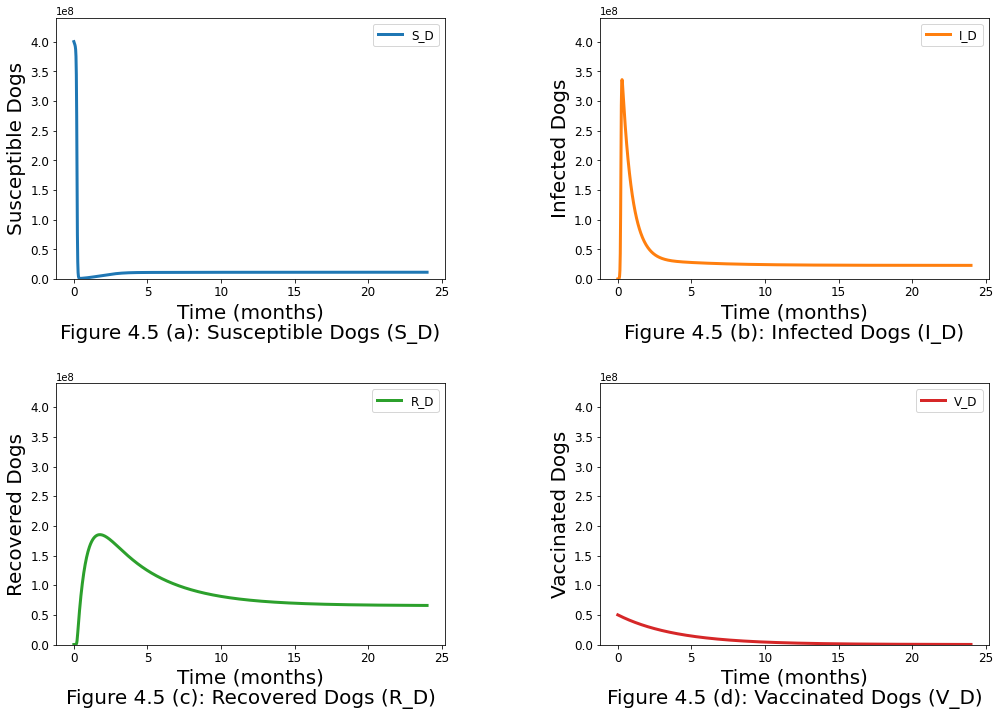

In [25]:
max_population_dogs = np.max(res[:, 3:])
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Settings
line_width = 3
font_size = 14
title_font_size = 16
label_font_size = 14
legend_font_size = 12
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  

# Plot of S_D
axes[0, 0].plot(t, res[:, 3], label='S_D', lw=line_width, color=colors[0])
axes[0, 0].set_xlabel('Time (months)',  fontdict={'size': 20})
axes[0, 0].set_ylabel('Susceptible Dogs',fontdict={'size': 20})
axes[0, 0].tick_params(axis='both', labelsize=12)
axes[0, 0].legend(fontsize=legend_font_size)
axes[0, 0].set_title('Figure 4.5 (a): Susceptible Dogs (S_D)', fontdict={'size': 20}, y=-0.25)
axes[0, 0].set_ylim([0, max_population_dogs * 1.1])
axes[0, 0].grid(False)

# Plot  of I_D
axes[0, 1].plot(t, res[:, 4], label='I_D', lw=line_width, color=colors[1])
axes[0, 1].set_xlabel('Time (months)', fontdict={'size': 20})
axes[0, 1].set_ylabel('Infected Dogs', fontdict={'size': 20})
axes[0, 1].tick_params(axis='both', labelsize=12)
axes[0, 1].legend(fontsize=legend_font_size)
axes[0, 1].set_title('Figure 4.5 (b): Infected Dogs (I_D)', fontdict={'size': 20}, y=-0.25)
axes[0, 1].set_ylim([0, max_population_dogs * 1.1])
axes[0, 1].grid(False)

# Plot of  R_D
axes[1, 0].plot(t, res[:, 5], label='R_D', lw=line_width, color=colors[2])
axes[1, 0].set_xlabel('Time (months)', fontdict={'size': 20})
axes[1, 0].set_ylabel('Recovered Dogs', fontdict={'size': 20})
axes[1, 0].tick_params(axis='both', labelsize=12)
axes[1, 0].legend(fontsize=legend_font_size)
axes[1, 0].set_title('Figure 4.5 (c): Recovered Dogs (R_D)', fontdict={'size': 20}, y=-0.25)
axes[1, 0].set_ylim([0, max_population_dogs * 1.1])
axes[1, 0].grid(False)

# Plot of  V_D
axes[1, 1].plot(t, res[:, 6], label='V_D', lw=line_width, color=colors[3])
axes[1, 1].set_xlabel('Time (months)', fontdict={'size': 20})
axes[1, 1].set_ylabel('Vaccinated Dogs', fontdict={'size': 20})
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].legend(fontsize=legend_font_size)
axes[1, 1].set_title('Figure 4.5 (d): Vaccinated Dogs (V_D)', fontdict={'size': 20}, y=-0.25)
axes[1, 1].set_ylim([0, max_population_dogs * 1.1])
axes[1, 1].grid(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig('Dog_populations_2x2.png', dpi=300)
plt.show()


##### THE PLOT OF DOG POPULATIONS

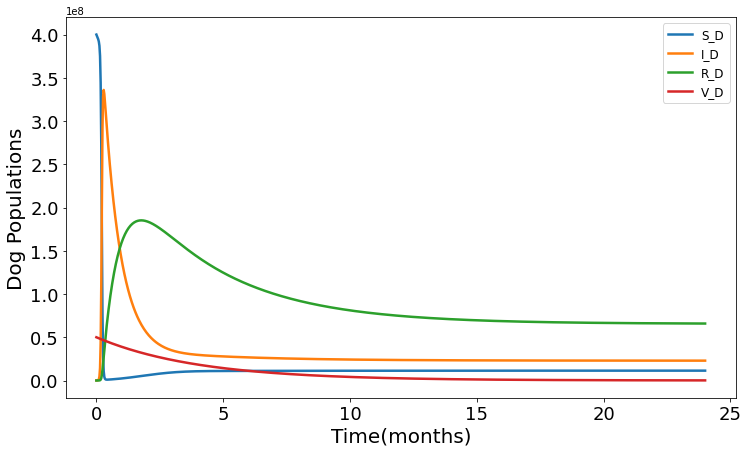

In [26]:
plt.figure(figsize=(12,7))
plt.plot(t, res[:,3],label='S_D',  lw=2.5)
plt.plot(t, res[:,4],label='I_D',  lw=2.5)
plt.plot(t, res[:,5],label='R_D',  lw=2.5)
plt.plot(t, res[:,6], label='V_D',  lw=2.5)
plt.xlabel('Time(months)', fontdict={'size': 20})
plt.ylabel('Dog Populations',  fontdict={'size': 20})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.savefig('Dog population_1.png')

####  THE FUNCTION  FOR VARYING MODEL PARAMETERS

In [27]:
def compare_simul(new_arr, old_params, param_name,pop_ind,change_ind, y_lab, savename=''):
    plt.figure(figsize=(12,7))

    for i in range(len(new_arr)):
        old_params[change_ind] = new_arr[i]
        res1 = odeint(myfun, y0=y0, t=t, args=(old_params,),rtol=1e-6, atol=1e-6)
        plt.plot(t, res1[:,pop_ind], label=f'{param_name}: {new_arr[i]}', lw=2.5)

    plt.xlabel('Time(months)', fontdict={'size': 20})
    plt.ylabel(y_lab, fontdict={'size': 20})
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=12)
    plt.savefig(f'{savename}.png')

#### EFFECTS  OF CONTACT RATES ON INFECTED DOG POPULATIONS

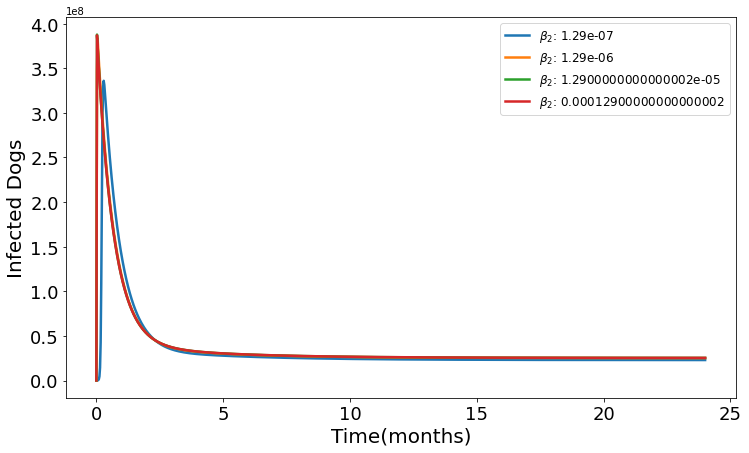

In [28]:
beta_values = [1.29*1e-7,  1.29*1e-6, 1.29*1e-5, 1.29*1e-4]
params = [lambda_, sigma, beta_1, mu_H, gamma, delta, wedge, phi, beta_2, mu_D, eta, tau, theta]
compare_simul(new_arr=beta_values, old_params=params, param_name=r'$\beta_2$', pop_ind=4, change_ind=8, y_lab='Infected Dogs',  savename='Infected_11')

#### EFFECTS  OF TREATMENT ON RECOVERED DOG POPULATIONS

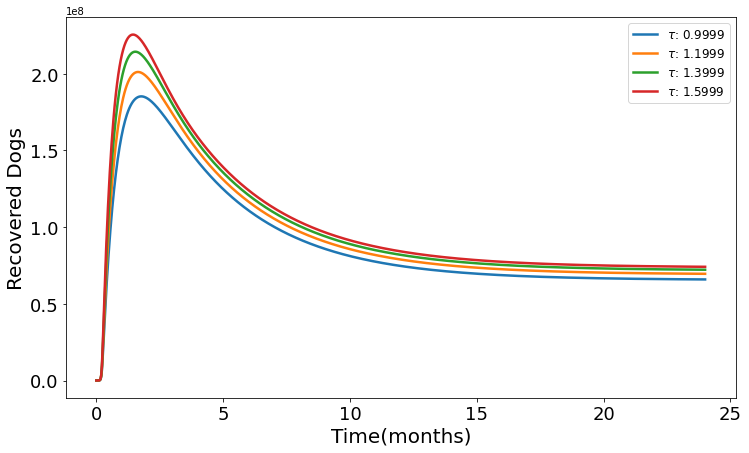

In [29]:
tau_values = [0.9999, 1.1999, 1.3999, 1.5999]
params = [lambda_, sigma, beta_1, mu_H, gamma, delta, wedge, phi, beta_2, mu_D, eta, tau, theta]
compare_simul(new_arr=tau_values, old_params=params, param_name=r'$\tau$', pop_ind=5, change_ind=11, y_lab='Recovered Dogs', savename='Recovered_4')

#### EFFECTS OF  BIRTH RATES OF DOGS ON INFECTED DOG POPULATIONS

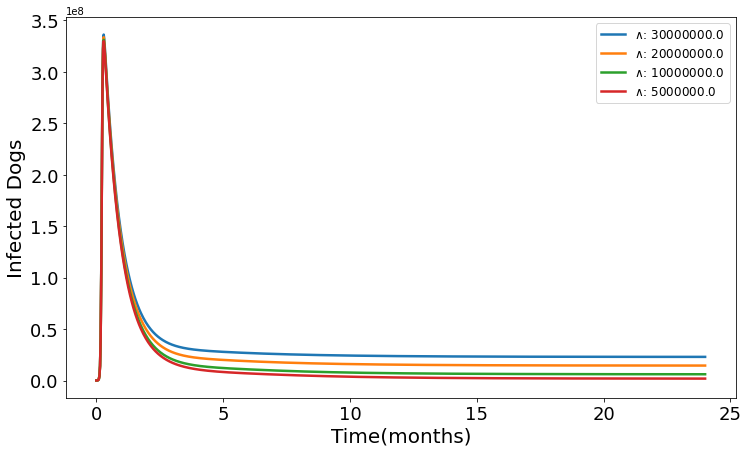

In [30]:
wedge_values = [3*1e7, 2*1e7, 1*1e7, 0.5*1e7]
params = [lambda_, sigma, beta_1, mu_H, gamma, delta, wedge, phi, beta_2, mu_D, eta, tau, theta]
compare_simul(new_arr=wedge_values, old_params=params, param_name=r'$\wedge$', pop_ind=4, change_ind=6, y_lab='Infected Dogs', savename='Infected 12')

#### EFFECTS OF NATURAL DEATH RATES OF DOGS ON INFECTED DOG POPULATIONS

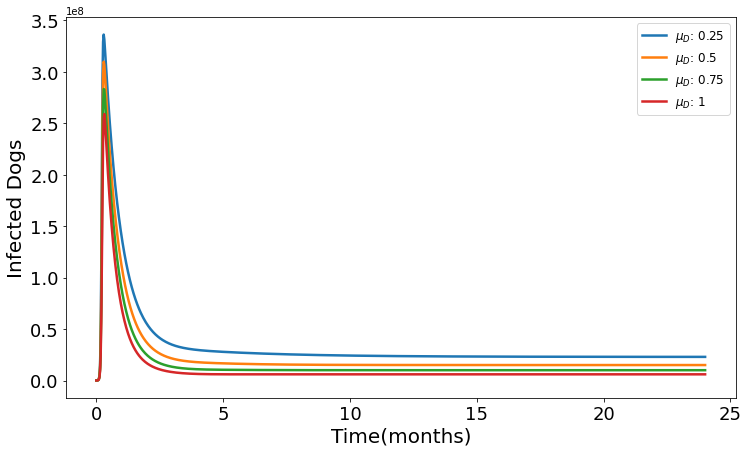

In [31]:
mu_D_values = [0.25, 0.5, 0.75, 1]
params = [lambda_, sigma, beta_1, mu_H, gamma, delta, wedge, phi, beta_2, mu_D, eta, tau, theta]
compare_simul(new_arr=mu_D_values, old_params=params, param_name=r'$\mu_D$', pop_ind=4, change_ind=9, y_lab='Infected Dogs', savename='Infected_10')

#####  EFFECTS OF TREATMENT ON INFECTED DOG POPULATIONS

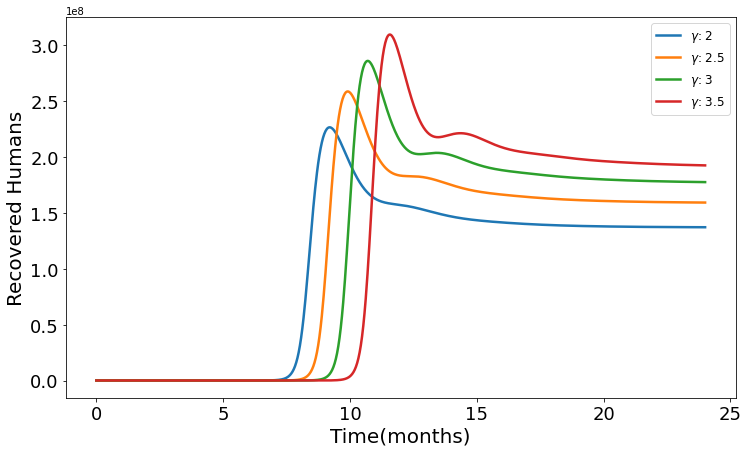

In [32]:
gamma_values = [2, 2.5, 3, 3.5]
params = [lambda_, sigma, beta_1, mu_H, gamma, delta, wedge, phi, beta_2, mu_D, eta, tau, theta]
compare_simul(new_arr=gamma_values, old_params=params, param_name=r'$\gamma$', pop_ind=2, change_ind=4, y_lab='Recovered Humans', savename='Recovered_2')

#### EFFECTS OF VACCINATION ON INFECTED DOG POPULATINS

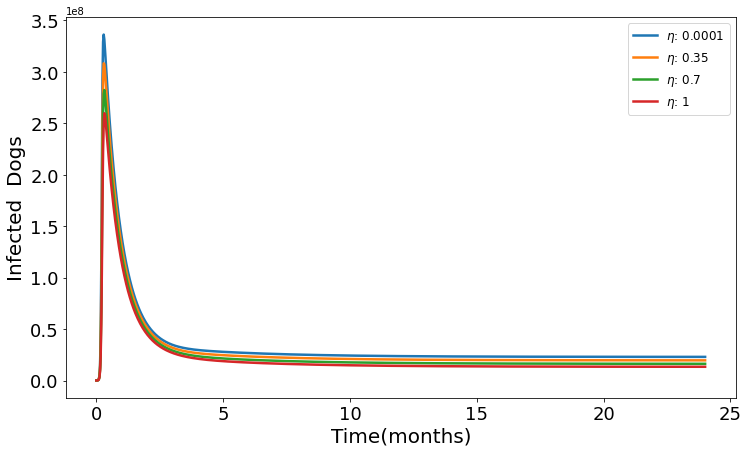

In [33]:
eta_values = [0.0001, 0.35, 0.7, 1]
params = [lambda_, sigma, beta_1, mu_H, gamma, delta, wedge, phi, beta_2, mu_D, eta, tau, theta]
compare_simul(new_arr=eta_values, old_params=params, param_name=r'$\eta$', pop_ind=4, change_ind=10, y_lab='Infected  Dogs', savename='Vaccinated 3')

#### EFFECTS OF TREATMENT ON RECOVERED DOG AND HUMAN POPULATIONS

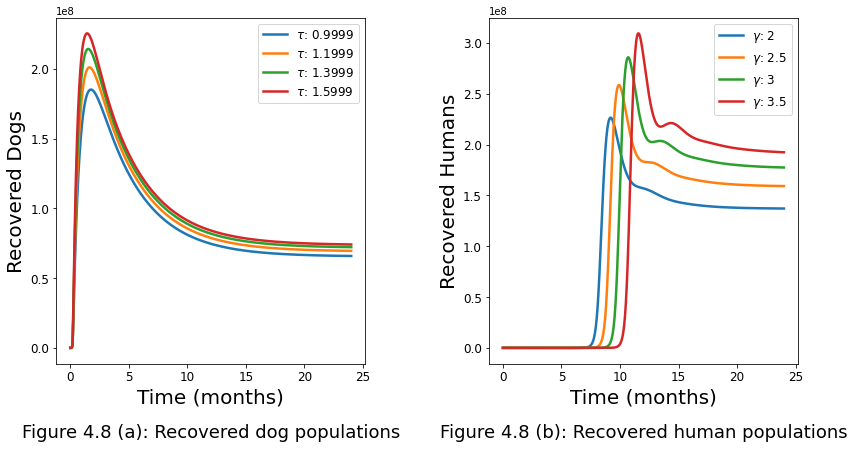

In [34]:

# Parameters
tau_values = [0.9999, 1.1999, 1.3999, 1.5999]
gamma_values = [2, 2.5, 3, 3.5]
params = [lambda_, sigma, beta_1, mu_H, gamma, delta, wedge, phi, beta_2, mu_D, eta, tau, theta]
pop_ind_dogs = 5
pop_ind_humans = 2
change_ind_tau = 11
change_ind_gamma = 4
y_lab_dogs = 'Recovered Dogs'
y_lab_humans = 'Recovered Humans'

fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# Plot of tau_values
for tau in tau_values:
    params[change_ind_tau] = tau
    res = odeint(myfun, y0, t, args=(params,), rtol=1e-6, atol=1e-6)
    axes[0].plot(t, res[:, pop_ind_dogs], label=f'$\\tau$: {tau}', lw=2.5)
axes[0].set_xlabel('Time (months)', fontsize=20)
axes[0].set_ylabel(y_lab_dogs, fontsize=20)
axes[0].legend(fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Plot of gamma_values
for gamma in gamma_values:
    params[change_ind_gamma] = gamma
    res = odeint(myfun, y0, t, args=(params,), rtol=1e-6, atol=1e-6)
    axes[1].plot(t, res[:, pop_ind_humans], label=f'$\\gamma$: {gamma}', lw=2.5)
axes[1].set_xlabel('Time (months)', fontsize=20)
axes[1].set_ylabel(y_lab_humans, fontsize=20)
axes[1].legend(fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=12)

# Figure labels for each subplot
axes[0].text(0.5, -0.2, 'Figure 4.8 (a): Recovered dog populations', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=18)
axes[1].text(0.5, -0.2, 'Figure 4.8 (b): Recovered human populations', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=18)

# Save the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(wspace=0.4)  
plt.savefig('Recovered_Populations_3.png', dpi=300, bbox_inches='tight')

plt.show()